In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster

In [2]:
def averageDistToCenter(X,C):
    avdist = np.sum(np.sqrt(np.sum((X - C)**2,axis=0)),axis=0)
    avdist /= np.maximum(np.size(X,axis=1),1)
    return avdist

def KMeans(K, X, doPrinting=False):
    d = np.size(X,axis=0)
    N = np.size(X,axis=1)
    I = np.eye(K)
    R = X[:,np.random.randint(0,N,K)] #random start centers
    M = np.zeros((d,K)).astype(int)
    changes = True
    iters = 0
    while changes:
#         D = np.sum((R.T[np.newaxis,:,:] - X.T[:,np.newaxis,:])**2., axis=-1).T # distances from centers
        D = -2. * np.dot(X.T,R) + np.sum(R**2,axis=0,keepdims=True)# it is not necessary to add X^2
        m = np.argmin(D, axis=1)
        newM = np.take(I,m,axis=0).astype(int) # matrix of membership
        changes = not np.array_equal(M,newM)
        M = newM
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1) # new centers
        iters +=1
    if doPrinting:
        avDistToCenter = np.array([averageDistToCenter(X[:,M[:,i] == 1], R[:,i,np.newaxis]) for i in range(K)])
        groupSizes = np.sum(M.T,axis=1)
        print('Average distance to center within groups:\n',avDistToCenter)
        print("Iterations: ", iters, "\n")
        print("Group sizes: ", groupSizes, "\n")
    return R, M, m

In [3]:
def generateData(N,d,K,p,mi,Sigma):
    A = np.linalg.cholesky(Sigma.T).T
    distributions = np.random.choice(np.arange(0,K), N, p=p)
# print('N=\n',N,'\n\n','d=\n',d,'\n\n','K=\n',K,'\n\n','p=\n',p,'\n\n','mi=\n',mi,'\n\n','Sigma=\n',Sigma, '\n\n','A=\n', A)
    X = np.random.randn(d,N)
    for i in range(N):
        X[:,i] = mi[:,distributions[i]] + np.dot(A[:,:,distributions[i]], X[:,i])
    return X, distributions

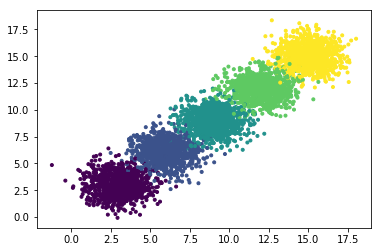

In [4]:
N = 5000
d = 2
K = 5
p = np.ones(K)/K
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array([np.eye(d) for i in range(K)]).T
X, groups = generateData(N,d,K,p,mi,Sigma)
plt.scatter(X[0,:],X[1,:], marker='.', c=groups)
plt.show()

Average distance to center within groups:
 [ 1.23156616  1.23709419  1.24275418  1.2600991   1.2542238 ]
Iterations:  11 

Group sizes:  [1041  975 1003  988  993] 

CPU times: user 44 ms, sys: 0 ns, total: 44 ms
Wall time: 24.9 ms
[0 0 0 ..., 0 0 0]
(2, 975)


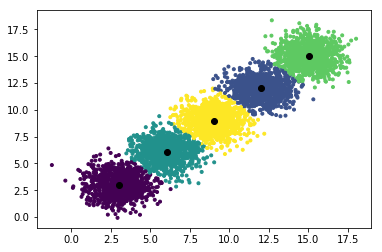

In [5]:
%time R, M, m = KMeans(K,X, doPrinting=True)
plt.scatter(X[0,:],X[1,:], marker='.',c=m)
print(M[:,1])
print(X[:,M[:,1] == 1].shape)
plt.plot(R[0,:],R[1,:], 'ko')
plt.show() 

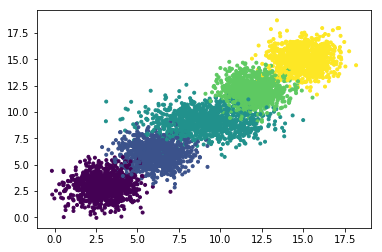

In [6]:
N = 5000
d = 2
K = 5
p = np.ones(K)/K
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array([np.eye(d) for i in range(K)]).T
Sigma[:,:,2] = np.array([[3,0],[0,1]])
X, groups = generateData(N,d,K,p,mi,Sigma)
plt.scatter(X[0,:],X[1,:], marker='.', c=groups)
plt.show()

Average distance to center within groups:
 [ 1.2529182   1.31364872  1.52049059  1.23581774  1.31452657]
Iterations:  22 

Group sizes:  [ 991 1070  885  993 1061] 



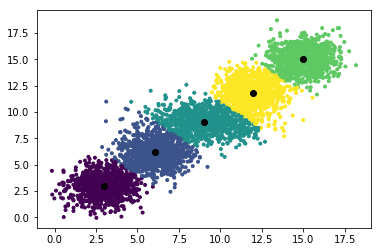

In [7]:
R, M, m = KMeans(K,X, doPrinting=True)
plt.scatter(X[0,:],X[1,:], marker='.',c=m)
plt.plot(R[0,:],R[1,:], 'ko')
plt.show() 

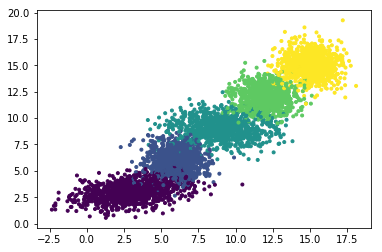

In [8]:
N = 5000
d = 2
K = 5
p = np.ones(K)/K
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array([np.eye(d) for i in range(K)]).T
Sigma[:,:,2] = np.array([[3,0],[0,1]])
Sigma[:,:,0] = np.array([[3,1],[1,1]])
X, groups = generateData(N,d,K,p,mi,Sigma)
plt.scatter(X[0,:],X[1,:], marker='.', c=groups)
plt.show()

Average distance to center within groups:
 [ 1.29140152  1.40643931  1.4738821   1.22062468  1.52861735]
Iterations:  17 

Group sizes:  [1003 1184  921 1015  877] 



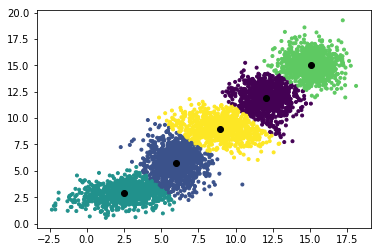

In [9]:
R, M, m = KMeans(K,X, doPrinting=True)
plt.scatter(X[0,:],X[1,:], marker='.',c=m)
plt.plot(R[0,:],R[1,:], 'ko')
plt.show() 

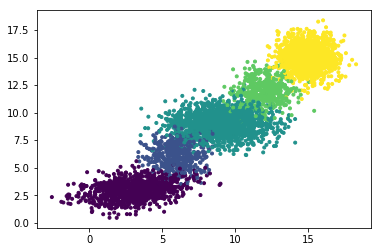

In [10]:
N = 5000
d = 2
K = 5
p = np.ones(K)/K
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array([np.eye(d) for i in range(K)]).T
Sigma[:,:,2] = np.array([[3,0],[0,1]])
Sigma[:,:,0] = np.array([[3,1],[1,1]])
p = np.array([0.2, 0.1, 0.3, 0.1, 0.3])
X, groups = generateData(N,d,K,p,mi,Sigma)
plt.scatter(X[0,:],X[1,:], marker='.', c=groups)
plt.show()

Average distance to center within groups:
 [ 1.21369434  1.52619125  1.54171713  1.46096244  1.60396569]
Iterations:  41 

Group sizes:  [1522  641  908 1259  670] 



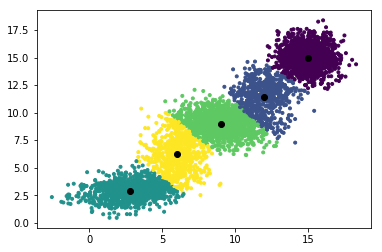

In [11]:
R, M, m = KMeans(K,X, doPrinting=True)
plt.scatter(X[0,:],X[1,:], marker='.',c=m)
plt.plot(R[0,:],R[1,:], 'ko')
plt.show() 

In [12]:
from mpl_toolkits import mplot3d

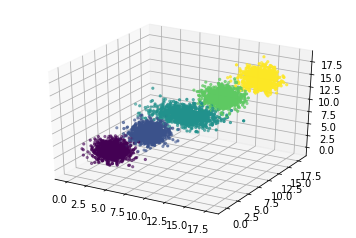

In [13]:
N = 5000
d = 3
p = np.ones(K)/K
K = 5
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array([np.eye(d) for i in range(K)]).T
Sigma[:,:,2] = np.array( [[3, 1, 0], [1, 1, 0], [0, 0, 1]])
X, groups = generateData(N,d,K,p,mi,Sigma)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[0,:],X[1,:],X[2,:], marker='.', c=groups);
plt.show()

Average distance to center within groups:
 [ 1.56410915  1.67594555  1.60759062  1.84742885  1.63946599]
Iterations:  18 

Group sizes:  [1022 1033  981  989  975] 



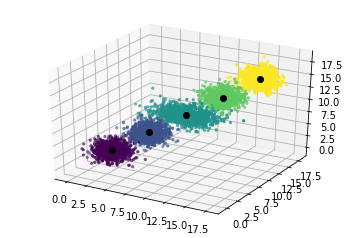

In [14]:
R, M, m = KMeans(K,X, doPrinting=True)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[0,:],X[1,:],X[2,:], marker='.', c=groups);
ax.plot3D(R[0,:],R[1,:],R[2,:],'ko')
plt.show()

In [15]:
d = 100
K = 10
p = np.ones(K)/K
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array([np.eye(d) for i in range(K)]).T
X, groups = generateData(N,d,K,p,mi,Sigma)
g = groups+1
s = np.array([np.sum(g[g == i])/i for i in range(1,K+1)]).astype(int)
print('True group sizes:\n', s)

True group sizes:
 [499 521 530 509 475 463 510 470 519 504]


In [20]:
import time
startT = time.time()
%time R, M, m = KMeans(K,X, doPrinting=True)
endT = time.time()
print("K-Means took %s to compute" % (endT - startT))

Average distance to center within groups:
 [  9.91190651   9.94720503  17.94732332   9.96515721   9.93697056
   9.88159204  10.02137116  17.94929961   9.93085593   9.93552883]
Iterations:  15 

Group sizes:  [ 463  499 1023  272  249  238  509  980  475  292] 

CPU times: user 176 ms, sys: 0 ns, total: 176 ms
Wall time: 44.6 ms
K-Means took 0.04545402526855469 to compute


In [19]:
%time kmeans = cluster.KMeans(n_clusters=K, random_state=0).fit(X)

CPU times: user 948 ms, sys: 36 ms, total: 984 ms
Wall time: 252 ms
